# Задание

* Попробовать найти и показать различные инсайты в этом датасете с помощью графиков Seaborn, Matplotlib и Plotly
* Дополнить графики комментариями

# Описания полей

* age	возраст
* gender	пол repexc_date
* city_type	Тип города проживания клиента
* full_mob	Длительность взаимоотношений с банком

* ml_balance	ипотека
* cl_balance_0m	потребительский кредит
* loan_balance_0m	все кредиты

* td_balance_0m	депозит
* casa_balance_0m	счета

* dc_trx_cnt	количество трат по картам
* dc_trx_sum	сумма трат по картам
* Avg_trx	средний размер транзакции
* avgtrx_to_balance	


* min_casa_balance_1q	показатели по счетам за квартал
* max_casa_balance_1q	
* avg_casa_balance_1Y	показатели по счетам за год

* min_td_balance_1q	
* max_td_balance_1q	
* avg_td_balance_1Y

* min_loan_balance_1q	
* max_loan_balance_1q	
* avg_loan_balance_1Y

* min_cl_balance_1q	
* max_cl_balance_1q	
* avg_cl_balance_1Y	
* loan_to_deposit	

* income	доход клиента
* nbi	доход от клиента без OPEX

In [54]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from tqdm.auto import tqdm
from sklearn.preprocessing import LabelEncoder

In [55]:
df = pd.read_csv('test_cluster.csv', encoding='cp1251', sep=';')
df.head(10)


,age,gender,city_type,full_mob,ml_balance,cl_balance_0m,loan_balance_0m,td_balance_0m,casa_balance_0m,dc_trx_cnt,...,min_loan_balance_1q,max_loan_balance_1q,avg_loan_balance_1Y,min_cl_balance_1q,max_cl_balance_1q,avg_cl_balance_1Y,loan_to_deposit,Avg_trx,avgtrx_to_balance,nbi
0,71,NaN,<100,103,0.0,0.0,0.00,0.0,0.000000e+00,0,...,0.00,0.00,0.000000,0.0,0.0,0.0,NaN,NaN,NaN,NaN
1,49,NaN,Mega,81,0.0,0.0,0.00,0.0,3.272937e+03,0,...,0.00,0.00,0.000000,0.0,0.0,0.0,NaN,NaN,NaN,28.762952
2,56,NaN,Mega,81,0.0,0.0,0.00,0.0,6.249755e+03,6,...,0.00,0.00,0.000000,0.0,0.0,0.0,NaN,854.670000,0.083467,1973.335539
3,47,NaN,Mega,81,0.0,0.0,0.00,0.0,1.435494e+04,0,...,0.00,0.00,0.000000,0.0,0.0,0.0,NaN,NaN,NaN,364.008556
4,74,NaN,Mega,81,0.0,0.0,0.00,0.0,9.151177e+04,0,...,0.00,0.00,0.000000,0.0,0.0,0.0,NaN,NaN,NaN,6651.416562
5,72,М,Mega,50,0.0,0.0,0.00,0.0,9.369080e+04,0,...,0.00,0.00,0.000000,0.0,0.0,0.0,NaN,NaN,NaN,2433.644326
6,46,NaN,<100,81,0.0,0.0,0.00,0.0,5.350795e+03,0,...,0.00,0.00,0.000000,0.0,0.0,0.0,NaN,NaN,NaN,177.408546
7,62,NaN,<100,56,0.0,0.0,0.00,0.0,4.783591e+04,0,...,0.00,0.00,0.000000,0.0,0.0,0.0,NaN,NaN,NaN,1284.357885
8,39,NaN,100-500,13,0.0,0.0,0.00,0.0,2.919013e+06,0,...,0.00,0.00,0.000000,0.0,0.0,0.0,NaN,NaN,NaN,17397.286761
9,36,М,<100,154,0.0,0.0,32413.52,0.0,0.000000e+00,83,...,32413.52,34119.49,38051.374167,0.0,0.0,0.0,NaN,3915.032892,4.383411,6065.052515


In [56]:
df.city_type.unique()
df = df[df.income != df.income.max()]
df = df[df.income != df.income.max()]
df = df[df.td_balance_0m != df.td_balance_0m.max()]
df = df[df.td_balance_0m != df.td_balance_0m.max()]
# выкинули из набора пиковые значения


In [5]:
df.loc[:,['age', 'city_type', 'full_mob', 'loan_balance_0m', 'income', 'nbi']]

,age,city_type,full_mob,loan_balance_0m,income,nbi
0,71,<100,103,0.00,0.00,NaN
1,49,Mega,81,0.00,0.00,28.762952
2,56,Mega,81,0.00,0.00,1973.335539
3,47,Mega,81,0.00,0.00,364.008556
4,74,Mega,81,0.00,0.00,6651.416562
...,...,...,...,...,...,...
49995,57,<100,97,0.00,0.00,13775.933155
49996,58,Mega,34,0.00,0.00,8247.466438
49997,34,1M+,21,0.00,12405.50,1973.128710
49998,43,<100,52,39318.52,0.00,5101.543269


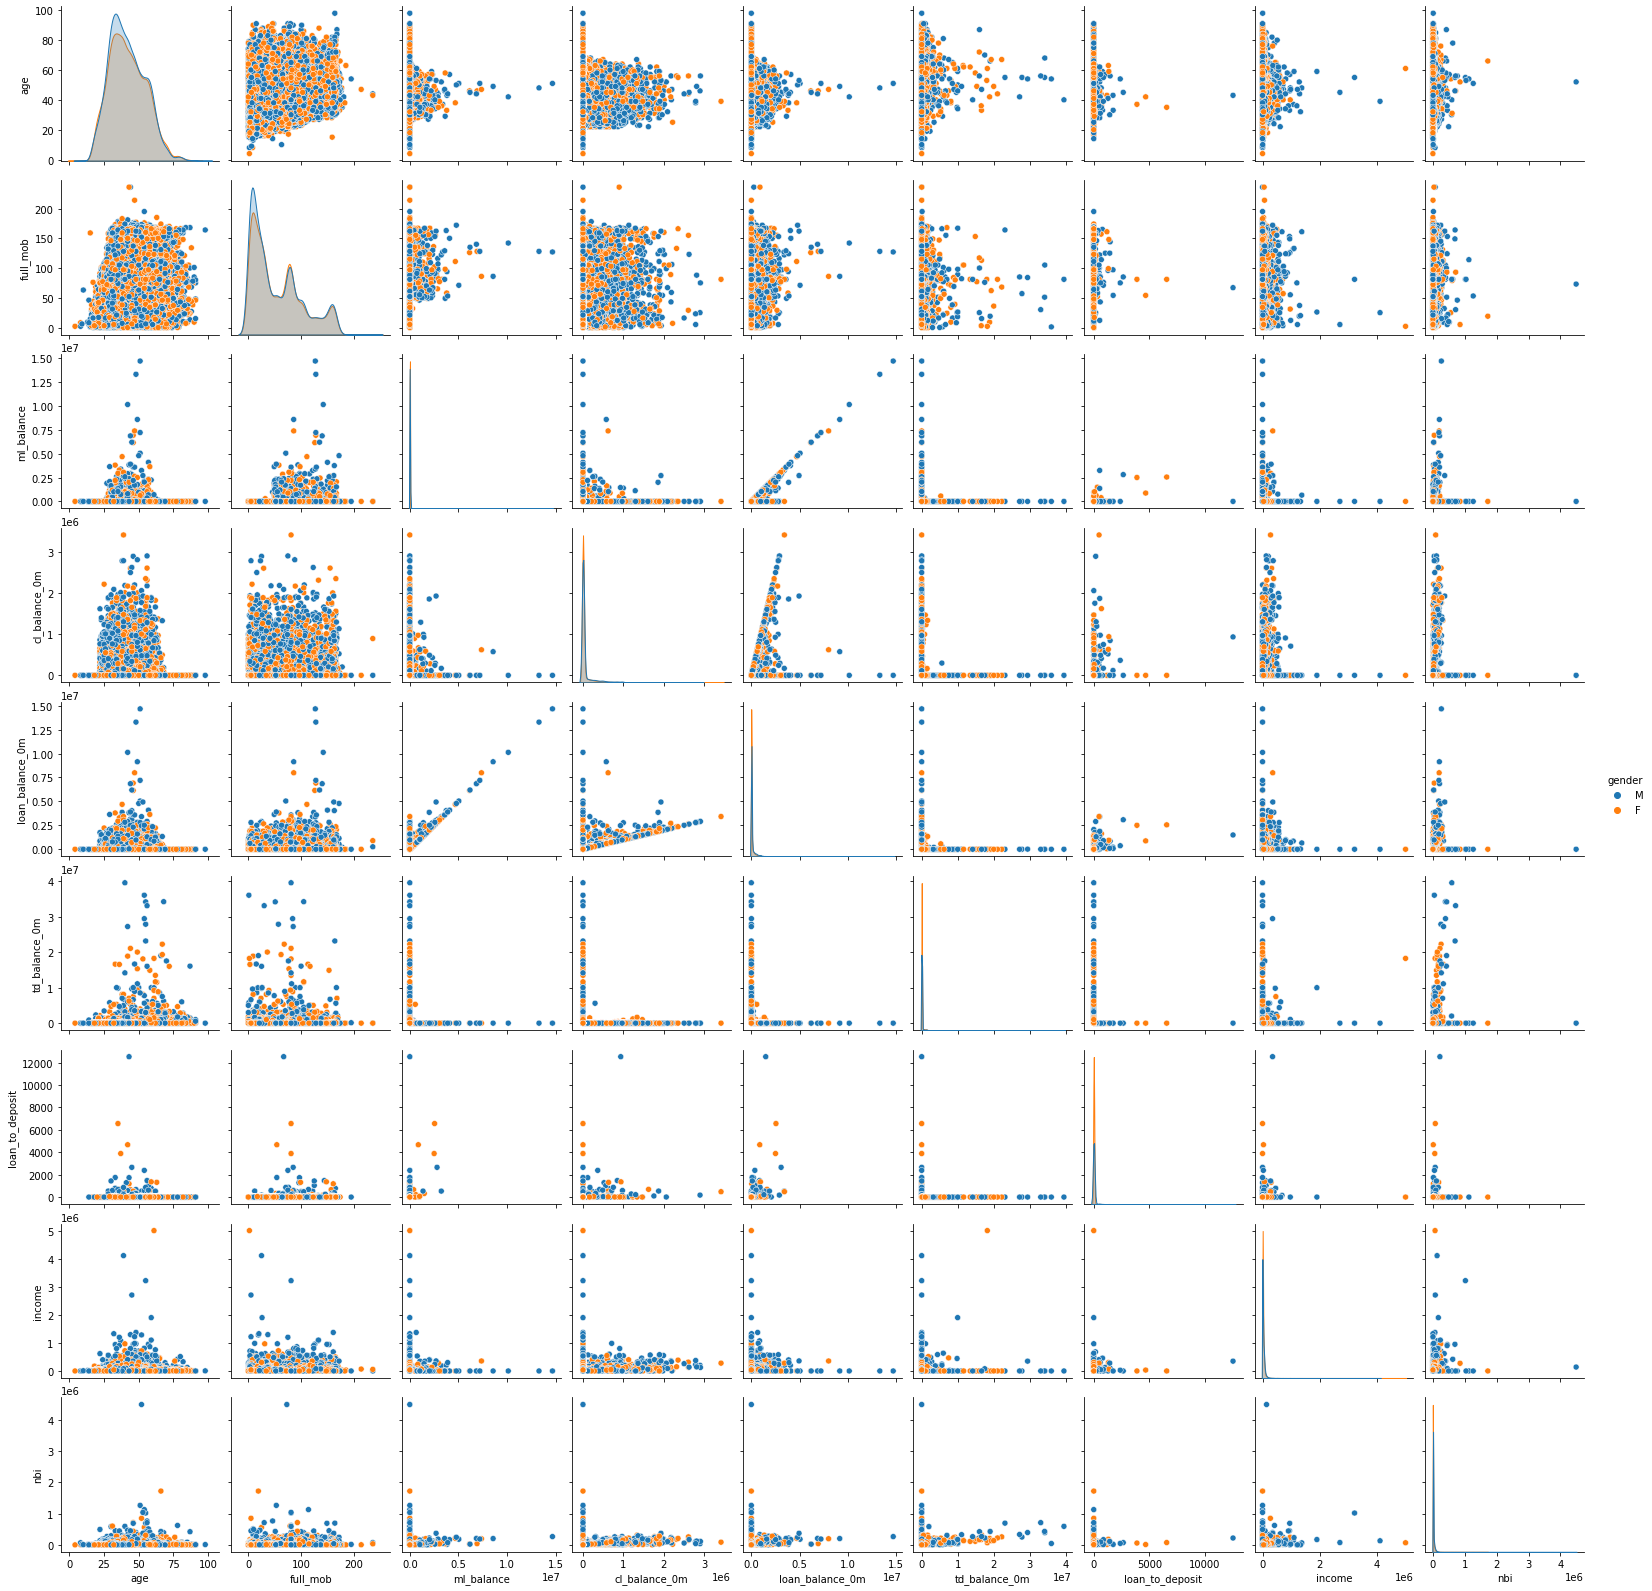

In [100]:
sns.pairplot(
                df.loc[:,['age', 'gender', 'city_type', 'full_mob', 'ml_balance', 'cl_balance_0m', 'loan_balance_0m', 'td_balance_0m', 'loan_to_deposit',  'income', 'nbi']]
                #,vars=['age', 'ml_balance']
                ,hue = 'gender'
            )

In [7]:
#наиболее закредитована группа  от 30 до 60 лет
#наибольший доход генерирует группа в районе 50 лет
#больше всего зарабатывает группа в возрасте 30-60 лет
#основная состовляющая долга по кредитам - ипотека


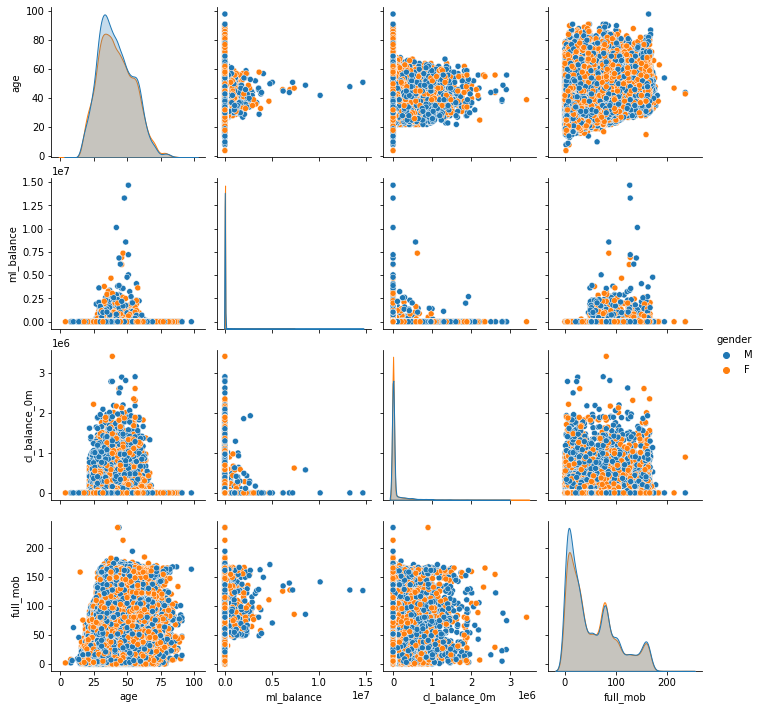

In [8]:
sns.pairplot(
                df.loc[:,['age', 'gender', 'city_type', 'full_mob', 'ml_balance', 'avg_loan_balance_1Y', 'cl_balance_0m', 'loan_balance_0m', 'dc_trx_sum', 'td_balance_0m', 'loan_to_deposit',  'income', 'nbi']]
                ,vars=['age', 'ml_balance', 'cl_balance_0m', 'full_mob']
                ,hue='gender'
            )

In [9]:
#банки выдают ипотеку чаще, если длительность отношений с клиентом превышает 3.5 ( 42 месяца) года

<AxesSubplot:xlabel='city_type', ylabel='Count'>

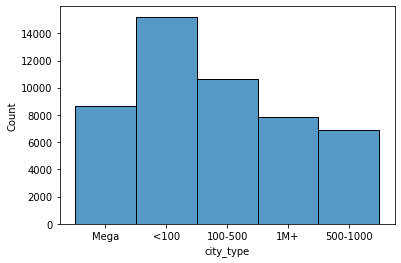

In [87]:
#plt.hist(df.loc[:,['age']], 10)
r = df.loc[:,['age', 'city_type', 'gender']].dropna()

sns.histplot(r, x="city_type",)

<AxesSubplot:xlabel='age', ylabel='Count'>

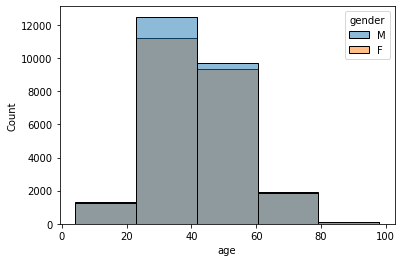

In [33]:
r = df.loc[:,['age', 'city_type', 'gender', 'ml_balance']]
sns.histplot(r, x="age", hue="gender", bins=5)

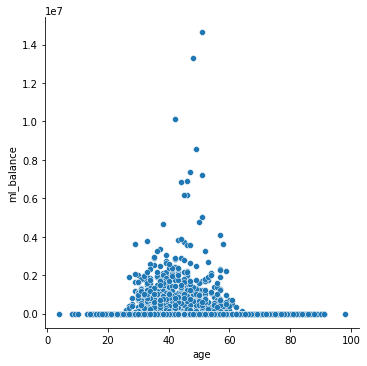

In [23]:
sns.relplot(data=r, x="age", y = "ml_balance")

<AxesSubplot:>

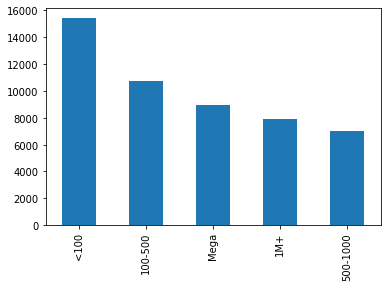

In [36]:
r = df.loc[:,['city_type', 'ml_balance']]
df['city_type'].value_counts().plot(kind='bar')
#большая часть заемщиков проживает в городах с населением > 500

In [92]:
r = df.groupby(['city_type', ]).mean()
r

,age,full_mob,ml_balance,cl_balance_0m,loan_balance_0m,td_balance_0m,casa_balance_0m,dc_trx_cnt,dc_trx_sum,income,...,min_loan_balance_1q,max_loan_balance_1q,avg_loan_balance_1Y,min_cl_balance_1q,max_cl_balance_1q,avg_cl_balance_1Y,loan_to_deposit,Avg_trx,avgtrx_to_balance,nbi
city_type,,,,,,,,,,,,,,,,,,,,,
100-500,42.347441,60.883565,10124.896902,67425.976933,87603.419787,49929.042666,39305.289188,115.002331,234040.814211,24215.240921,...,81037.631805,95842.786788,85144.700506,62490.458010,72953.527656,62717.149110,14.136347,4927.095735,77.426161,12051.526579
1M+,40.897559,46.524725,17195.920150,56136.875604,79948.365563,47378.763606,84484.940750,101.960162,191820.931888,19730.065577,...,74622.843108,86520.169783,77622.003405,51780.261215,60304.099645,51212.098208,20.260695,4720.899170,234.168360,11047.031826
500-1000,41.571388,53.765808,10097.149888,56742.027056,74968.727910,46269.882633,38067.838723,103.648069,204275.195062,25981.102657,...,68286.751794,81290.940227,70358.961689,51336.163904,61098.784306,49994.262387,7.767164,4810.480433,1315.863533,10287.795807
<100,40.898242,55.419742,7645.058283,63128.287281,77683.896154,29483.063695,23621.875394,98.022764,181179.771779,19653.335028,...,71998.826006,84285.082683,74736.554067,58358.725229,67841.743489,58358.705108,16.885032,4622.587821,105.985798,10869.756611
Mega,42.124428,48.082654,23571.543928,53539.474825,85913.582915,154005.670094,151002.757683,108.868647,310289.018071,30840.585471,...,80441.308682,95737.084044,86436.393361,49067.292151,58285.347089,49117.683023,24.762535,8094.803648,350.479526,15425.450987


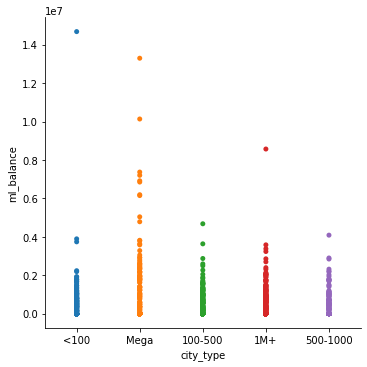

In [93]:
sns.catplot(x = "city_type", y="ml_balance", data=df, jitter=False)
#стоимость ипотеки выше в крупном городе

<AxesSubplot:xlabel='city_type'>

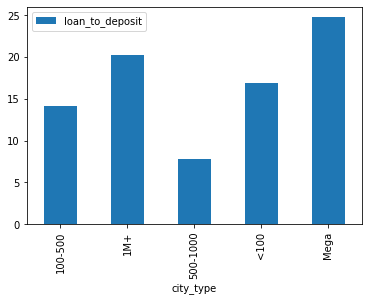

In [94]:
r[['loan_to_deposit']].plot(kind='bar')
#в городах с население 500-1000 тысяч человек в среднем, соотношение между займом и наличными средствами меньше

<AxesSubplot:xlabel='city_type'>

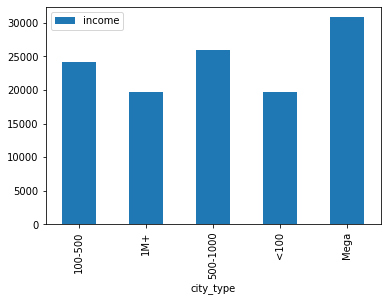

In [95]:
r[['income']].plot(kind='bar')
#в среднем зарплата выше в самых крупных городах

<AxesSubplot:xlabel='city_type'>

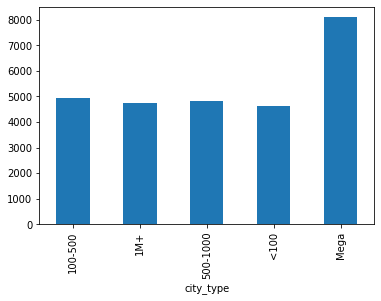

In [96]:
r['Avg_trx'].plot(kind='bar') 
#средний размер транзакции выше в крупных городах/агломерациях

<AxesSubplot:xlabel='city_type'>

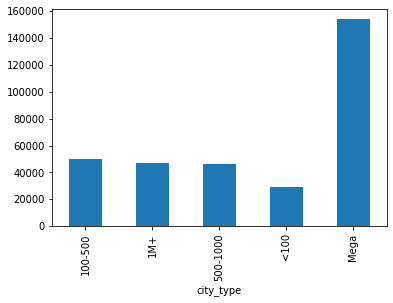

In [99]:
r['td_balance_0m'].plot(kind='bar') 